##  Chapter 8: Linear Unsupervised Learning

# 8.2 Fixed spanning sets, orthonormality, and projections

The fundamental principles of unsupervised learning all lie in some very rudimentary ideas from linear algebra combined with the cost-function based approach to learning we have seen previously with supervised methods. This is because unsupervised learning is about effectively representing datasets with no output, i.e., *only input data*. Our goal with such data is simply to effectively represent it, and this is a task that has roots in the notion of a *spanning set of vectors* from basic linear algebra.

In this Section of notes we review the fundamental concepts from linear algebra surrounding the notion of a spanning set of vectors. This includes: linear independence, learning proper weights for a fixed basis set representation, orthogonal bases and representation, and projections. Reviewing these topics up front will allow us to much more effectively tackle and intuit unsupervised leaning techniques since they can be thought of as direct extensions.

In [1]:
# This code cell will not be shown in the HTML version of this notebook
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_8_library') 
sys.path.append('./chapter_8_images') 
sys.path.append('./chapter_8_datasets') 

# import section helper
import section_8_2_helpers

# standard imports
import matplotlib.pyplot as plt

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## 8.2.1  Perfectly representing data via a fixed spanning set

Remember when thinking about data points in a multi-dimensional *vector space*, we can think of them simultaneously as 'dots' (as shown in the left panel) or as 'arrows' (as in the middle panel below). When thinking about *spanning sets of vectors* it is often helpful to visualize points in the same space using both of these conventions - i.e., some as 'dots' and others as 'arrows' as shown in the right panel.  Those vectors drawn as arrows are particular points - often called a *basis* or *spanning set of vectors* - over which we aim to efficiently represent every other point in the space.  Those other vectors shown as dots are those points we wish to represent over our basis / spanning set.

<figure>
  <img src= 'chapter_8_images/vector_dot_perspective.png' width="110%"  height="auto" alt=""/>
  <figcaption>   
<strong>Figure 1:</strong> <em> (left) vectors as points. (middle) vectors as arrows. (right) some vectors shown as dots, others as arrows.  Those shown as arrows are a *basis or spanning set* over which we aim to represent the other vectors. </em>  </figcaption> 
</figure>

Lets suppose our set of input points - our *dataset* - is written as  \{$\mathbf{x}_1,\,\mathbf{x}_2,\,...,\mathbf{x}_P\}$ and lives in $N$ dimensions (that is, each point is $N$ dimensional).  Moreover throughout we will assume that our dataset has been *mean-centered* - a simple and completely reversible operation that involves subtracting off the mean of the dataset along each input dimension - so that it straddles the origin. This sort of normalization is almost always done in practice, and is computationally inexpensive to execute. 

In order for our basis / spanning set to be capable of perfectly representing all $P$ of our points it too must live in the same $N$ dimensional space.  For a candidate basis / spanning set $\mathbf{c}_1,\,\mathbf{c}_2,...,\mathbf{c}_N$ to be capable of perfectly representing such generic $N$ dimensional (input) data means that for each data point a set of weights exists so that, in particular linear combination, our basis set can match each data point as

\begin{equation}
\sum_{n=1}^N \mathbf{c}_n w_{n,\,p} = \mathbf{x}_p  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P.
\end{equation}


Technically speaking in order for this possibility to exist our spanning set must be *linearly independent* - that is, the spanning vectors do not 'overlap', they point in completely different directions in the space.

As the simplest example imagine our spanning set was the set of $N$ *standard basis vectors*.  The $n^{th}$ element of a standard basis takes the form of vectors that consist entirely of zeros, except for a $1$ in its $n^{th}$ slot

\begin{equation}
\text{($n^{th}$ element of the standard basis)}\,\,\,\,\,\,\,\, \mathbf{c}_n = 
\begin{bmatrix}
0 \\ 
0 \\
\vdots \\
0 \\
1 \\
0 \\
\vdots \\
0
\end{bmatrix}.
\end{equation}

To represent a data point $\mathbf{x}_p$ over the standard basis is a trivial affair, and one can easily check that the perfect weights must be defined as

\begin{equation}
w_{n,\,p} = x_{n,\,p}
\end{equation}

i.e., each weight is simply equal to the value of the data point we aim to represent.  For most any other spanning set however these weights must be solved for numerically, which we frame in terms of a cost function minimization after the examples below.

However note that if indeed the spanning set of vectors is linearly independent, then having properly tuned the weights of point $\mathbf{x}_p$, denoted as the $N$ length vector

\begin{equation}
 \mathbf{w}_p = \begin{bmatrix}  w_{1,\,p} \\ w_{2,\,p} \\ \vdots \\ w_{N,\,p} \end{bmatrix}
 \end{equation}

then this weight set provides the new representation of $\mathbf{x}_p$ with respect to the spanning set.  For example, in the trivial case where our spanning set consists of the standard basis our representation or feature vector $\mathbf{w}_p = \mathbf{x}_p$ is the data point itself!  Otherwise $\mathbf{w}_p$ - typically referred to as the new **encoding** of $\mathbf{x}_p$* in the *transformed feature space* whose coordinate axes are defined by the spanning set - is a vector that differs from original data point. 

> Once tuned the weight vector $\mathbf{w}_p$ provides us with the representation or *encoding* of $\mathbf{x}_p$ over the spanning set $\mathbf{c}_1,...,\mathbf{c}_N$.  In other words, the weight vector $\mathbf{w}_p$ is our representation of $\mathbf{x}_p$ in the space defined by the spanning set.

<figure>
  <img src= 'chapter_8_images/feature_space_rep.png' width="110%"  height="auto" alt=""/>
  <figcaption>   
<strong>Figure 2:</strong> <em> (left) A 2-d point, $\mathbf{x}_1$, shown in the space spanned by vectors $\mathbf{c}_1$ and $\mathbf{c}_2$. (right) Representation, also known as the *encoding*, of $\mathbf{x}_1$ in the transformed feature space. </em>  </figcaption> 
</figure>

#### <span style="color:#a50e3e;">Example 1 </span>  Perfect representation with complete spanning set in $N=2$ dimensions

Lets examine an example of a spanning set of vectors in $N=2$ dimensions.  Below we run an animation showing how the set of two spanning vectors

\begin{equation}
\mathbf{c}_1 = 
\begin{bmatrix}
2 \\ 
1
\end{bmatrix}  
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\mathbf{c}_2 = 
\begin{bmatrix}
1\\
2
\end{bmatrix}.
\end{equation}

Because these two vectors are *linearly independent*, that is they do not overlap completely and point in different directions in the space, we can perfectly represent any point in the space using some linear combination of them as 

\begin{equation}
w_{1,\,p}\mathbf{c}_1 + w_{2,\,p}\mathbf{c}_2 = \mathbf{x}_p
\end{equation}

where the weights $w_{1,\,p}$ and $w_{2,\,p}$ are unique to each point $\mathbf{x}_p$.  Once properly tuned the weight vector $\mathbf{w}_p = \begin{bmatrix} w_{1,\,p} \\ w_{2,\,p} \end{bmatrix} $ provides us with a new representation or encoding of $\mathbf{x}_p$ in the transformed feature space whose coordinates are precisely our spanning set.

In the animation below we range show two panels - the original space in the left, and the transformed feature space in the right defined by the above spanning set.  In each panel the two spanning set vectors $\mathbf{c}_1$ and $\mathbf{c}_2$ are shown as solid black arrows, and points $\mathbf{x}_p$ (taken over a course range of the input space here) are shown as black dots.  Each point $\mathbf{x}_p$ is shown simultaneously in the original and transformed feature space, where the point is *encoded* by its weight vector $\mathbf{w}_p$.  In each space the appropriate linear combination of the two spanning vectors required to represent the point is shown as a red arrow, and each scaled spanning vector is shown as a blue arrow. As the slider is pushed from left to right additional points additional points are shown represented over the spanning set / encoded points in the transformed feature space.

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# animate a two-dimensional spanning set ranging over a coarse set of points in the space
C = np.array([[2,1],[1,2]])
savepath = 'chapter_8_videos/animation_1.mp4'
section_8_2_helpers.perfect_visualize_transform(savepath,C,num_frames = 200,fps=10)

In [5]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="chapter_8_videos/animation_1.mp4" type="video/mp4">
  </video>
""")

In the next cell we show how this spanning set transforms a prototypical dataset of 50 data points. 

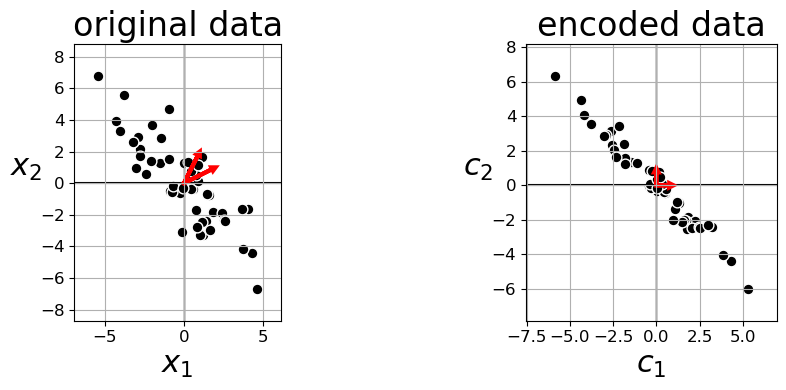

In [2]:
# This code cell will not be shown in the HTML version of this notebook
def center(X):
    '''
    A function for normalizing each feaure dimension of an input array, mean-centering
    and division by its standard deviation
    
    '''
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_normalized = X - X_means

    return X_normalized

# load in dataset to perform PCA on
X_original = np.loadtxt('chapter_8_datasets/2d_span_data.csv',delimiter=',')

# center data
X = center(X_original)

# plot data and spanning set, and tranformed version
C = np.array([[2,1],[1,2]])
section_8_2_helpers.perfect_visualize_transform_static(C,X=X)

-------

One way we can solve for the proper weights - so as to represent the data over our spanning set - is by setting up / minimizing an appropriate cost function.  Here - since equation (1) is what we desire to hold for the ideal weights - it is natural (as in our development of e.g., linear regression) to square the difference between both sides of equation (1) as $\left(\sum_{n=1}^N \mathbf{c}_n w_{p,n} - \mathbf{x}_p\right)^2$ and tune the corresponding weights to make this squared error as small as possible.  So for each data point $\mathbf{x}_p$ we have a cost function 

\begin{equation}
g\left(w_{1,\,p},...,w_{N,\,p}\right) = \left(\sum_{n=1}^N \mathbf{c}_n w_{n,\,p} - \mathbf{x}_p\right)^2  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P
\end{equation}

that when minimized appropriately provides us with a proper set of parameters for representing $\mathbf{x}_p$ over the spanning set.   While we could certainly use an iterative method like gradient descent to minimize this single-point cost, here we can in fact directly setup and solve the [first order system](https://jermwatt.github.io/mlrefined/blog_posts/Computational_Calculus/Part_13_unconstrained_optimality_conditions.html) of equations.

It is perhaps easiest to see this by writing the above cost function more compactly as

\begin{equation}
h\left(\mathbf{w}_p\right) = \left \Vert \mathbf{C}\mathbf{w}_p - \mathbf{x}_p \right\Vert_2^2.
\end{equation}

where the $N\times N$ matrix $\mathbf{C}$ is formed by stacking the spanning set vectors column-wise, and the $N\times 1$ vectors $\mathbf{w}_p$ as 

\begin{equation}
\mathbf{C} = 
\begin{bmatrix}
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert \\
\mathbf{c}_1 \,\,\, \mathbf{c}_2 \,\,\,\,\,\, \mathbf{c}_N \\
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert 
\end{bmatrix}
\,\,\,\,\,\,\,\,\,\,\, 
\mathbf{w}_p = 
\begin{bmatrix}
 w_{p,1} \\
 w_{p,2} \\
 \vdots  \\
 w_{p,N}
\end{bmatrix}
\end{equation}

Now setting the gradient of the cost function to zero and solving for $\mathbf{w}_p$ gives the linear symmetric system of equations for each $\mathbf{w}_p$, which we can conveniently write algebraically as 

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,}\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P.
\end{equation}

Numerically this sort of symmetric system of equations can be solved via e.g., coordinate descent.  Once these are solved for - and we have our learned weights $\hat{\mathbf{w}}_p$ -  we can then perfectly represent a point $\mathbf{x}_p$ over the spanning set as we desired in equation (1) as 

\begin{equation}
\mathbf{C}\hat{\mathbf{w}}_p  = \sum_{n=1}^N \mathbf{c}_n \hat{w}_{n,\,p} = \mathbf{x}_p.
\end{equation}

Notice here that we can take the average of the individual single-point cost functions in equation (4) / (5), giving a cost function over the entire dataset

\begin{equation}
g\left(\mathbf{w}_1,...,\mathbf{w}_P\right) = \frac{1}{P}\sum_{p = 1}^P \left \Vert \mathbf{C}\mathbf{w}_p - \mathbf{x}_p \right\Vert_2^2.
\end{equation}

This is just a convenient way of writing out the entire list of $P$ single-point cost functions together i.e., we get no new solution methods by doing this, as the joint cost decomposes over the weight vectors $\mathbf{w}_p$.  Formally then our optimization problem to recover all of the proper weight vectors can be expressed as

\begin{equation}
\underset{\mathbf{w}_1,\mathbf{w}_2,...,\mathbf{w}_P}{\text{minimize}} \,\, \frac{1}{P}\sum_{p = 1}^P \left \Vert \mathbf{C}\mathbf{w}_p - \mathbf{x}_p \right\Vert_2^2.
\end{equation}

## 8.2.2  Perfect representation using a fixed orthonormal spanning set

A very special kind of basis / spanning set one often sees when representing data points - a form of which we will see later with our primordial unsupervised learning method *Principal Component Analysis* in particular -  is one whose elements are *perpendicular* and *unit length*.  Such a spanning set $\mathbf{c}_1,\,\mathbf{c}_2,\,...\,\mathbf{c}_N$ is one that spans an entire space, but whose elements are perpendicular have length one.  Algebraically this is written as 

\begin{array}
\
\mathbf{c}_n^T\mathbf{c}_m^{\,} = 0 \\
\left \Vert \mathbf{c}_n \right \Vert_2^2 = 1 \,\,\,\,\text{for}\,\,n=1...N.
\end{array}

Note that the same constraints expressed in terms of the concatenated basis matrix $\mathbf{C}$ can be written compactly as 

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,} = \mathbf{I}_{N\times N}.
\end{equation}

Often such a spanning sets are likewise referred to as *orthonormal* or - sometimes - *orthogonal* (although technically speaking the latter term should only be applied when a set of vectors consists of perpendicular elements that are not necessarily unit-length, it is unfortunately often used to refer to unit-length perpendicular vectors as well).  

#### <span style="color:#a50e3e;">Example 2 </span>  Standard basis

The *standard basis* discussed above the most common example of an *orthogonal* basis - one whose elements are perpendicular and are unit-length.  In the next cell we show a fine range of linear combinations of the standard basis in $N=2$ dimensions.  As with any spanning set / basis, linear combinations of these two vectors can perfectly represent any point in the space.

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# animate a two-dimensional spanning set ranging over a coarse set of points in the space
C = np.array([[1,0],[0,1]])
savepath = 'chapter_8_videos/animation_2.mp4'
section_8_2_helpers.perfect_visualize(savepath,C,num_frames = 200,fps=10)

In [12]:
## This code cell will not be shown in the HTML version of this notebook
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="chapter_8_videos/animation_2.mp4" type="video/mp4">
  </video>
""")

---

As with any other basis / spanning set we can express the particular weights over which a dataset of $P$ points is represented over an orthonormal basis using equations (4) - (8).  However, note that because the elements of an orthonormal basis are perpendicular and unit length the form of the symmetric linear system in equation (4) simplifies drastically.   Again notice how the matrix multiplication on the left hand side -  an inner product of our spanning set vectors against themselves - reduces to the identity matrix $\mathbf{C}^T\mathbf{C} = \mathbf{I}_{N\times N}$.  Thus the "system of equations" in equation (4), providing the ideal weight vector or *encoding* $\mathbf{w}_p$ for each data point $\mathbf{x}_p$ over an orthonormal basis of vectors is given simply by 

\begin{equation}
\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p      \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P.
\end{equation} 

In other words, if a basis / spanning set is orthonormal there is no system of equations left to solve for - we get the solution / encoded version $\mathbf{w}_p$ of each point $\mathbf{x}_p$ directly as a simple inner product of the spanning set against each data point!  Practically speaking this means that computing the weight vector or encoding $\mathbf{w}_p$ of a point $\mathbf{x}_p$ is considerably cheaper if our spanning set is orthonormal.

> When our spanning set is orthonormal the algebraic formula for the weight vector or *encoding* $\mathbf{w}_p$ of a point $\mathbf{x}_p$ is exceedingly simple, and is given by $\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p$.  Practically speaking, this is considerably cheaper computationally speaking than when our spanning set is not orthonormal (when we must solve a linear system to recover the weight vector).

Note further how here how we can - with these ideal weights solved for - express our data representation over an orthonormal spanning set in equation (1) very nicely in vector / matrix notation as

\begin{equation}
\mathbf{C}\,\mathbf{C}^T\mathbf{x}_p = \mathbf{x}_p  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P.
\end{equation}

In other words, when the spanning set is orthonormal the entire set of encodings of a dataset can be expressed strictly in terms of the spanning set and the data itself.

## 8.2.3  Imperfectly representing data using a fixed spanning set

Above we reviewed two important facts that we require for a spanning set / basis in order for it to be capable of perfectly representing points in a generic $N$ dimensional space:

1.  The set of vectors are *linearly independent*, that is they point in different directions in the space

2.  There are at least $N$ spanning vectors

What happens when we relax the second condition and suppose we more generally have $K\leq N$ spanning vectors / basis elements?  Unsurprisingly we can no longer perfectly represent a generic set of $P$ points in the space.  In $N$ dimensions this set of $K$ vectors can - at best - span a $K$ dimensional subspace.  For example as illustrated in the figure below, if $N=3$ the best any set of $K=2$ spanning vectors can do is span a hyperplane.  A set consisting of a single $K = 1$ spanning vector can only span a line.  In both instances we clearly will not be able to perfectly represent all possible points in a space, since our reach in each case is restricted to a lower dimensional *subspace* of the full space. 

<figure>
  <img src= 'chapter_8_images/PCA_proj.png' width="120%"  height="auto" alt=""/>
  <figcaption>   
<strong>Figure 3:</strong> <em> (left top) An example of data in $N = 2$ dimensions projected onto a $K=1$ dimensional subspace. (right top) An example of data projected in $N = 3$ dimensional space projected onto a $K=2$ dimensional subspace.  </em>  </figcaption> 
</figure>

While we may not be able to perfectly represent a given point or set of points in the space, we can try our best.  In complete analogy to the full spanning set representation in equation (1), here for a given set of $P$ points we aim to find ideal weights to represent each data points as precisely as possible.  Expressing this algebraically then our ideal weights should satisfy

\begin{equation}
\sum_{n=1}^K \mathbf{c}_n w_{n,\,p} \approx \mathbf{x}_p  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P
\end{equation}

where the $\approx$ should hold as tightly as possible.  Notice: the only difference between this desire and the one in equation (1) is that a) we have only $K$ vectors (the sum goes from $n=1$ to $K$, not $N$ as in equation (1)) and b) since we cannot generally hope for perfect equality we must settle for $\approx$.  

Mirroring the setup we saw above with a complete basis, the same logic then leads us to the Least Squares cost function (a generalization of equation (4) above) for each data point

\begin{equation}
g\left(w_{1,\,p},...w_{K,\,p}\right) = \left(\sum_{n=1}^K \mathbf{c}_n w_{n,\,p} - \mathbf{x}_p\right)^2   \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P
\end{equation}

where again here the only difference from the original cost function is that we now only have $K$ spanning set vectors.  Likewise we can derive the similar looking *first order system* of symmetric equations providing our ideal weights or encoding vectors $\mathbf{w}_p$, writing them neatly using the compact vector / matrix notation established previously as

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,}\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P.
\end{equation}

Here there is of course only one caveat: since we have only $K$ spanning set vectors the matrix $\mathbf{C}$ is $N\times K$, consisting of only our $K$ spanning vectors lined up column-wise $\mathbf{C} = 
\begin{bmatrix}
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert \\
\mathbf{c}_1 \,\,\, \mathbf{c}_2 \,\,\,\,\,\, \mathbf{c}_K \\
\vert \,\,\,\,\, \vert \,\,\, \cdots  \, \vert
\end{bmatrix}$.

Note how once the weight vectors / encodings $\mathbf{w}_p$ are computed the *projection* of $\mathbf{x}_p$ - i.e., its representation over the subspace spanned by $\mathbf{C}$ - is given by the formula $\mathbf{C}\mathbf{w}_p$.  This is called the *projection* because - as illustrated in the figure below - the representation is given by 'dropping' $\mathbf{x}_p$ perpendicularly onto the span of the hyperplane made by the span of the $K$ basis elements (hence the formula $\mathbf{C}\mathbf{w}_p$).  

In line with the same sort of 'coding' language often used to describe the weight vector $\mathbf{w}_p$ as the *encoding* of a point $\mathbf{x}_p$ in the (sub)space spanned by $K$ spanning vectors $\mathbf{c_1},\,\mathbf{c}_2,...,\mathbf{c}_K$ - which as we have seen (and as visualized in the figure above) - the *projection* of each point onto the subspace spanned by these $K$ vectors is often referred to as the *decoding* of the original data point. 

> Once tuned the weight vector $\mathbf{w}_p$ provides us with the representation or *encoded* version of $\mathbf{x}_p$ over the spanning set $\mathbf{C}$.  The *decoded* version of the original datapoint $\mathbf{x}_p$ is this point projected onto the space defined by the spanning vectors, which can be written as $\mathbf{C}\mathbf{w}_p$.

<figure>
  <img src= 'chapter_8_images/feature_space.png' width="85%"  height="auto" alt=""/>
  <figcaption>   
<strong>Figure 4:</strong> <em> 
(left panel)A dataset of points $\mathbf{x}_p$ in $N=3$ dimensions.  The linear subspace spanned of two vectors $\mathbf{c}_1$ and $\mathbf{c}_2$ is shown in red.   (middel panel) The encoding space spanned by $\mathbf{c}_1$ and $\mathbf{c}_2$, where our encoded vectors live e.g., $\mathbf{w}_p$ is the encoded version of $\mathbf{x}_p$.   (right panel)  The projected or *decoded* versions of each data point $\mathbf{x}_p$ shown in the subspace spanned by $\mathbf{C} = 
\begin{bmatrix}
\vert \,\,\,\,\, \vert \\
\mathbf{c}_1 \,\,\, \mathbf{c}_2\\
\vert \,\,\,\,\, \vert 
\end{bmatrix}$.  The decoded version of the original point $\mathbf{x}_p$ is expressed as $\mathbf{C}\mathbf{w}_p$.  
</em>  </figcaption> 
</figure>

## 8.2.4  Imperfect representation using a fixed orthonormal spanning set

<figure>
  <img src= 'chapter_8_images/autoencoder_geometry.png' width="95%" height="auto" alt=""/>
  <figcaption>   
<strong>Figure 5:</strong> <em> 
The geometry of projecting a point $\mathbf{x}$ onto a basis of orthogonal vectors, shown when using $K = 1$ vectors in the left panel and $K = 2$ in the right.  (left panel) The general projection (or decoding) of a point $\mathbf{x}$ onto a single basis vector $\mathbf{c}$ simplifies from $\mathbf{c}\frac{\mathbf{c}^T\mathbf{x}}{\mathbf{c}^T\mathbf{c}}$ to just $\mathbf{c}\mathbf{c}^T\mathbf{x}$ when $\mathbf{c}$ is orthogonal. This decoded point - living in the space spanned by $\mathbf{c}$ - is the point on $\mathbf{c}$ that lies closest to $\mathbf{x}$ and so minimizes the distance $\left\Vert \mathbf{c}\mathbf{c}^T\mathbf{x} - \mathbf{x}\right\Vert_2$.  (right panel)  The analogous scenario with two orthogonal vectors.  The projection / decoding of a point $\mathbf{x}$ over two orthogonal basis vectors $\mathbf{C} = 
\begin{bmatrix}
\vert \,\,\,\,\, \vert \,\,\,  \\
\mathbf{c}_1 \,\,\, \mathbf{c}_2 \\
\vert \,\,\,\,\, \vert \,\,\, 
\end{bmatrix} $

</em>  </figcaption> 
</figure>

If our spanning set / basis of $K$ elements is orthonormal the above formula for each weight vector encoding $\mathbf{w}_p$ once again reduces algebraically to 

\begin{equation}
\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p      \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P
\end{equation} 

since we will have 

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,} = \mathbf{I}_{K\times K}.
\end{equation}

Our representation is likewise given simply in terms of the incomplete spanning set and datapoints as

\begin{equation}
\mathbf{C}^{\,}\mathbf{C}^T\mathbf{x}_p \approx \mathbf{x}_p  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P.
\end{equation}

These formula are absolutely critical since - as will see beginning in the very next Section - when we next aim to *learn* the best basis for a given set of data the assumption of orthogonality simplifies this learning process significantly.

#### <span style="color:#a50e3e;">Example 3: </span> Dimension reduction using a fixed basis

Below we show how a prototypical three dimensional dataset is projected onto a two-dimensional subspace generated by two fixed vectors


\begin{equation}
\mathbf{c}_1 = 
\begin{bmatrix}
2 \\ 
1 \\
0
\end{bmatrix}  
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\mathbf{c}_2 = 
\begin{bmatrix}
1\\
2\\
0
\end{bmatrix}.
\end{equation}

In the left panel below the original data is shown, along with the two spanning vectors above shown as red vectors and the hyperplane they span colored light red.  Next in the middle panel we show how the encoded data is represented over the two spanning vectors, in the lower dimensional subspace.  Here each original point $\mathbf{x}_p$ is now represented via its corresponding weights / encoding $\mathbf{w}_p$.  In the right panel we show the *decoded* data - i.e., the result of projecting the original dataset onto the plane spanned by the two vectors $\mathbf{c}_1$ and $\mathbf{c}_2$.  Here each original point $\mathbf{x}_p$ projected into the plane is represented by its decoded version $\mathbf{C}\mathbf{w}_p$.

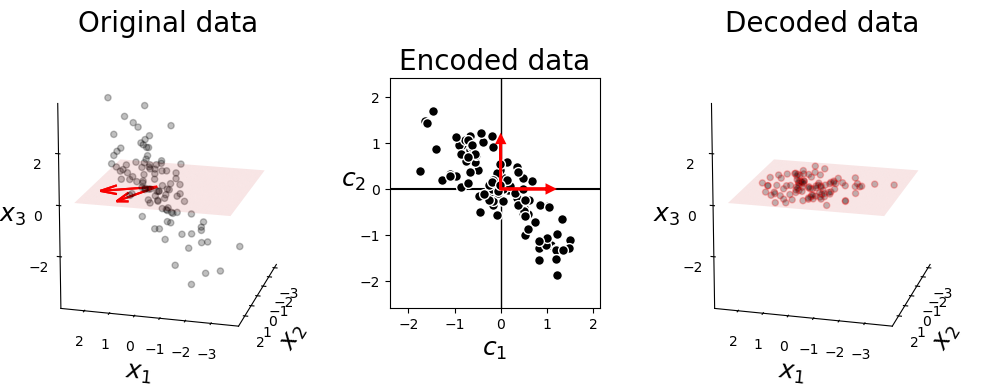

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset to perform PCA on
X_original = np.loadtxt('chapter_8_datasets/3d_span_data.csv',delimiter=',')

# center data
X_centered = center(X_original)

# take two random vectors, project onto a subspace spanned by them
C = np.array([[2,1,0],[1,2,0]]).T

# produce visuals
view = [15,105]
section_8_2_helpers.project_data_from_3d_to_2d(X_centered,C,view)

#### <span style="color:#a50e3e;">Example 4: </span> Role of efficient bases in digital image compression 

Every day we use digital image compression to reduce the size of digital images without adversely affecting their quality, so that we can store and transmit them more efficiently.  As we will see in this example digital image compression is a fundamental example of fixed basis dimension reduction.

As shown in the figure below, in a typical image compression scheme for an input image is first cut up into small square (typically $8 \times 8$ pixel blocks).  The values of pixels in each block (which are integers between $0$ and $255$ for an 8-bit grayscale image) are stacked into a column vector $\mathbf{x}$, and compression is then performed on these individual vectorized blocks .   Note: while we discuss image compression here for grayscale images The same idea applies to color images, only there we have three such images to compress - a red, green, and blue color channel image.

<figure>
  <img src= 'chapter_8_images/vectorize.png' width="110%" height="auto" alt=""/>
  <figcaption>   
<strong>Figure 6:</strong> <em> In a prototypical image compression scheme the input image is cut into $8 \times 8$ blocks. Each block is then vectorized to make a $64 \times 1$ column vector $y$ which will be input to the compression algorithm.
  </em>  </figcaption> 
</figure>

The primary idea behind many digital image compression algorithms is that with the use of specific bases, we only need very few of their elements to very closely approximate any natural image. One such basis, the $8 \times 8$ discrete cosine transform (DCT) which is the backbone of the popular JPEG compression scheme, consists of two-dimensional cosine waves of varying frequencies, and is shown in the figure below along with its analogue standard basis.  This basis is orthonormal, thus making computation quite efficient.

<figure>
  <img src= 'chapter_8_images/Fig_9_9.png' width="75%" height="auto" alt=""/>
  <figcaption>   
<strong>Figure 7:</strong> <em>(left) The set of $64$ DCT basis elements used for compression of $8 \times 8$ image blocks. For visualization purposes pixel values in each basis patch are gray-coded so that white and black colors correspond to the minimum and maximum value in that patch, respectively. (right) The set of $64$ standard basis elements, each having only one nonzero entry. Pixel values are gray-coded so that white and black colors correspond to entry values of $1$ and $0$, respectively. Most natural image blocks can be approximated as a linear combination of just a few DCT basis elements while the same cannot be said of the standard basis.
 </em>  </figcaption> 
</figure>

Most natural image blocks can be well approximated using only a few elements of the DCT basis. The reason is, as opposed to bases with more locally defined elements (e.g., the standard basis), each DCT basis element represents a fluctuation commonly seen across the entirety of a natural image block. Therefore with just a few of these elements, properly weighted, we can approximate a wide range of image blocks. In other words, instead of seeking out a basis (as with PCA), here we have a fixed basis over which image data can be very efficiently represented.

To perform compression, the DCT basis / spanning set patches shown in the figure above are vectorized into a sequence of $N=64$ fixed basis vectors $\left\{ \mathbf{c}_{n}\right\} _{n=1}^{N}$ in the same manner as the input image blocks. Concatenating these patches column-wise into a matrix $\mathbf{C}$ and supposing there are $P$ blocks in the input image, denoting by $\mathbf{x}_{p}$ its $p^{th}$ vectorized block, to represent the entire image over the basis we solve $P$ linear systems of equations of the form

\begin{equation}
\mathbf{C}\mathbf{w}_{p}=\mathbf{x}_{p} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p = 1...P
\end{equation}

Each encoding vector $\mathbf{w}_{p}$ in equation (9) stores the DCT coefficients (or weights) corresponding to the image block $\mathbf{x}_{p}$. Most of the weights in the encoding vectors $\left\{ \mathbf{w}_{p}\right\} _{p=1}^{P}$ are typically quite small. Therefore, as illustrated by an example image in Figure 6 below, setting even $80\%$ of the smallest weights to zero, and decoding each image patch over only $20\%$ of the basis elements, gives an approximation that is essentially indistinguishable from the original image. Even setting $99\%$ of the smallest weights to zero gives an approximation to the original data wherein we can still identify the objects in the original image. To compress the image, instead of storing each pixel value, only these few remaining nonzero coefficients are kept. 

<figure>
  <img src= 'chapter_8_images/Fig_9_10.png' width="90%" height="auto" alt=""/>
  <figcaption>   
<strong>Figure 8:</strong> <em> From left to right, the original $256 \times 256$ input image along with its three decoded / compressed versions where we keep only the largest $20\%$, $5\%$, and $1\%$ of the DCT coefficients to represent the image, resulting in compression by a factor of $5$, $20$, and $100$, respectively. Although, as expected, the visual quality deteriorates as the compression factor increases, the $1\%$ image still captures a considerable amount of information. This example is a testament to the efficiency of DCT basis in representing natural image data.
 </em>  </figcaption> 
</figure>